In [1]:
import pandas as pd
path2csv = "data/histopathologic-cancer-detection/train_labels.csv"
labels_df = pd.read_csv(path2csv)
labels_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [2]:
print(labels_df['label'].value_counts())

0    130908
1     89117
Name: label, dtype: int64


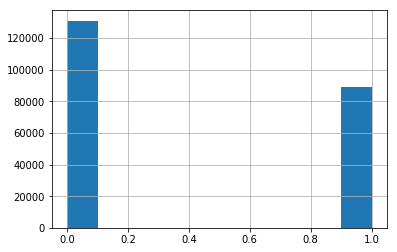

In [3]:
%matplotlib inline
labels_df['label'].hist()

In [4]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import os
%matplotlib inline

In [5]:
# ge5 ids for malignant images
malignantIds = labels_df.loc[labels_df['label']==1]['id'].values

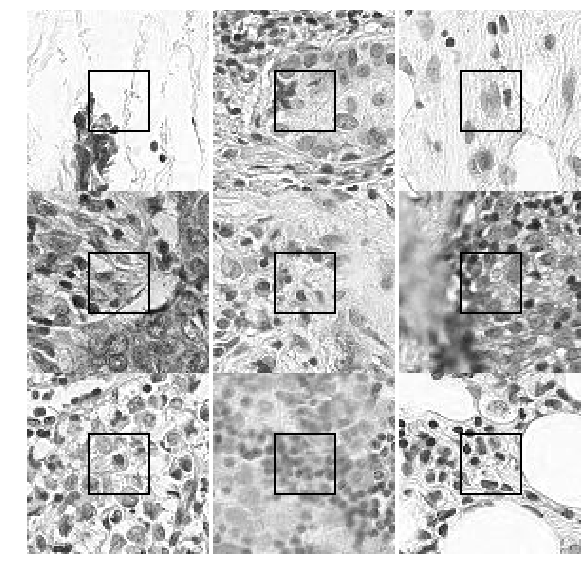

In [7]:
path2train = 'data/histopathologic-cancer-detection/train/'
color= False
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
nrows,ncols=3,3

for i, id_ in enumerate(malignantIds[:nrows*ncols]):
    full_filename = os.path.join(path2train, id_+'.tif')
    #load image
    img = Image.open(full_filename)
    
    # daw a 32*32 rectangle
    draw = ImageDraw.Draw(img)
    draw.rectangle(((32,32), (64, 64)), outline='green')
    plt.subplot(nrows, ncols, i+1)
    if color :
        plt.imshow(np.array(img))
    else:
        plt.imshow(np.array(img)[:,:,0], cmap = "gray")
    plt.axis('off')  

In [8]:
print('image shape: ', np.array(img).shape)
print("pixel value range from %s to %s" %(np.min(img), np.max(img)))

image shape:  (96, 96, 3)
pixel value range from 0 to 255


In [13]:
from PIL import Image
import torch
from torch.utils.data import Dataset
import pandas as bd
import torchvision.transforms as transforms
import os

In [14]:
torch.manual_seed(0)

In [33]:
class histoCancerDataset(Dataset):
    def __init__(self, data_dir, transform, data_type="train"):
        # path to images
        path2data = os.path.join(data_dir, data_type)
        
        #get a líst of images
        filenames = os.listdir(path2data)
        
        # get the full path to images
        self.full_filenames = [os.path.join(path2data, f) for f in filenames]
        
        # labels are in a csv file named train_labels.csv
        csv_filename = data_type +"_labels.csv"
        
        path2csvLabels = os.path.join(data_dir, csv_filename)
        
        # set data frame index to id
        labels_df.set_index("id", inplace= True)
        
        # obtain labels from data frame
        self.labels = [labels_df.loc[filename[:-4]].values[0] for filename in filenames]
        
        self.transform = transform
    
    def __len__(self):
        
        return len(self.full_filenames)
    
    def __getitem__(self, idx):
        
        #open image, apply transforms and return with labels
        image = Image.open(self.full_filenames[idx])
        image = self.transform(image)
        return image, self.labels[idx]
        

In [34]:
import torchvision.transforms as transforms
data_transformer = transforms.Compose([transforms.ToTensor()])

data_dir = "./data/histopathologic-cancer-detection/"
histo_dataset = histoCancerDataset(data_dir, data_transformer, "train")
print(len(histo_dataset))

KeyError: 'id'

In [28]:
# load an image

img, label = histo_dataset[9]
print(img.shape, torch.min(img), torch.max(img))


AttributeError: 'histoCancerDataset' object has no attribute 'full_filename'